# Support Vector Machine (SVM)

서포트 백터 머신은 결정 경계 즉, 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 어느 쪽에 속하는지 확인해서 분류과제를 수행 할 수 있게 된다.

SVM은 분류와 회귀 둘다 사용이 가능하다.



### 결정 경계 = 기준선

만약 데이터에 **2개 속성**(feature)만 있다면 **결정 경계**는 이렇게 간단한 **선 형태**가 된다.

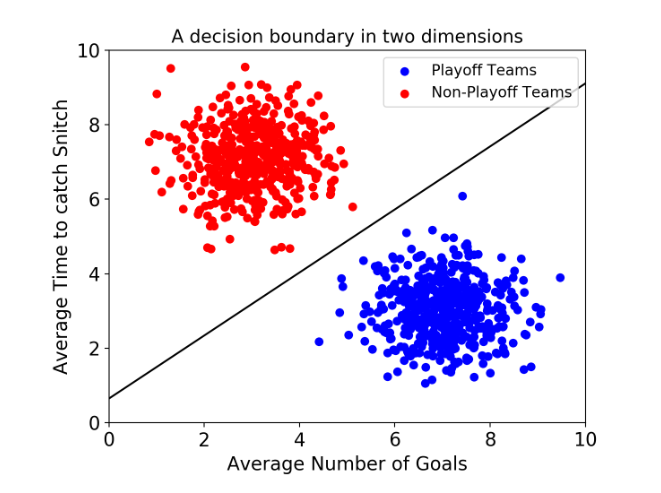

**속성(feature)이 3개**로 늘어난다면 3차원으로 아래와 같이 된다.

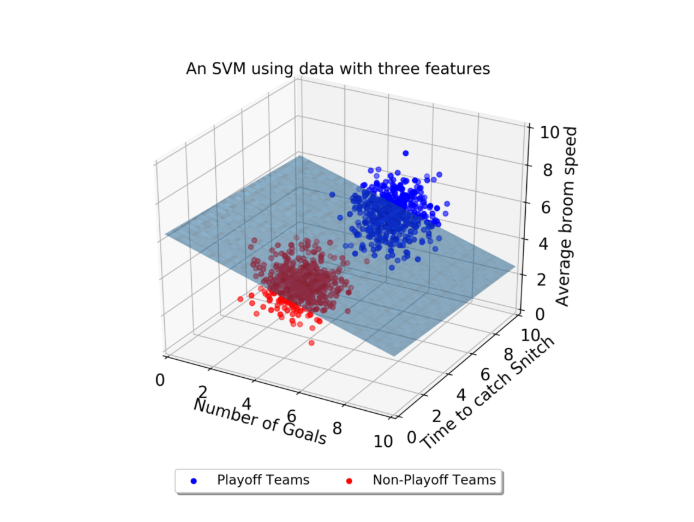

우리가 시각적으로 인지할 수 있는 차원은 3차원까지이다. 속성 개수가 늘어날 수록 당연히 복잡해질 것이다. **고차원의 결정 경계**를 **초평면(Hyperplane)**이라고 부른다.

### 최적의 결정 경계(Decision Boundary)

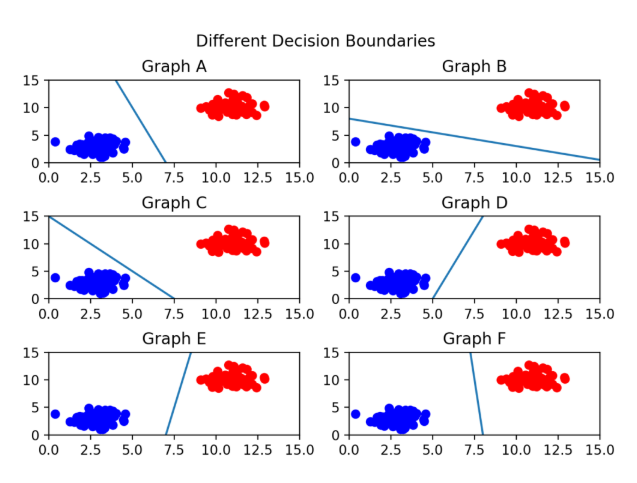

결정 경계는 **데이터 군집으로부터 최대한 멀리 떨어져 있는 것이 좋다.**

가장 **이상적이지 않은** 그래프: **C**

가장 **이상적인** 그래프: **F**

**Support Vectors**는 결정 경계와 **가까이 있는 데이터 포인트**들을 의미한다 .

### 마진(Margine)

마진은 결정 경계와 서포트 벡터 사이의 거리를 말한다.

아래 그림으로 이해해보자.



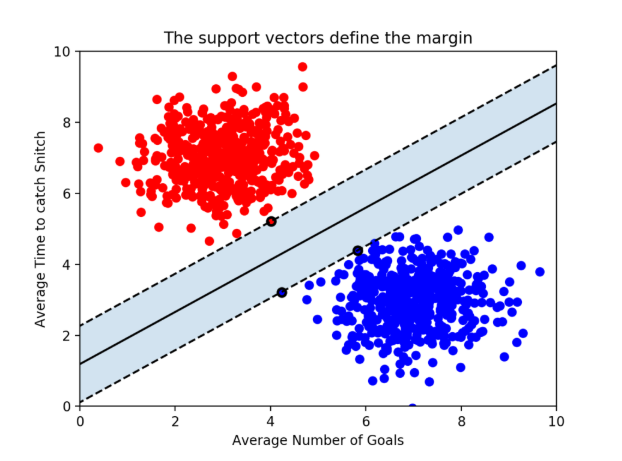

가운데 **실선**은 '**결정 경계**',

**실선부터 점선**까지의 거리가 '**마진**'이다.

빨간점 1개, 파란점 2개까지 영역을 두고 점선을 그어놓았다. **최적의 결정 경계는 마진을 최대화**한다.

위의 그림에서는 X축과 Y축 2개의 속성을 가진 데이터로 결정 경계를 그었는데, 총 3개의 데이터 포인트(서포트 벡터)가 필요했다.

-> 결정 경계의 기울기와 거리를 알기 위해서

 즉, N개의 속성을 가진 데이터에는 최소 n + 1개의 서포트 벡터가 존재한다는 것을 알 수 있다.

### 장점

대부분 머신러닝 지도 학습 알고리즘은 학습 데이터 모두를 사용하여 모델을 학습한다.

그런데 SVM에서는 결정 경계를 정의하는 게 결국 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 쓸 데 없는 수많은 데이터 포인트들을 무시할 수 있다.

그래서 매우 빠르다.

### 요약

- SVM은 분류에서 많이 사용하지만 회귀에서도 사용되는 지도학습 머신러닝 모델이다.

- SVM은 서포트 벡터(support vector)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류한다.

- **서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들이다.

- 서포트 벡터 결정 경계 사이의 거리를 마진(margin)이라고 한다.

- SVM은 허용 가능한 오류 범위 내에서 가능한 최대 마진을 만들려고 한다.

- 파라미터 C는 허용되는 오류 양을 조절한다. C 값이 클수록 오류를 덜 허용하며 이를 하드마진(hard margin)이라 부른다. 반대로 C값이 작을수록 오류를 더 많이 허용해서 소프트 마진(soft margin)을 만든다.

- SVM에서는 선형으로 분리할 수 없는 점들을 분류하기 위해 커널(kernel)을 사용한다.

- 커널(kernel)은 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환한다. 2차원의 점으로 나타낼 수 있는 데이터를 다항식(polynomial) 커널은 3차원으로, RBF 커널은 무한한 차원으로 변환한다.

- RBF 커널에는 파라미터 감마(gamma)가 있다. 감마가 너무 크면 학습 데이터에 너무 의존해서 오버피팅이 발생할 수 있다

- Problem

1. 간단한 데이터 셋을 만들어서 SVC 모델을 사용해보자.

2. 시각화까지 해보자


### 1. 데이터 정규화 / 데이터 전처리

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



X, y = make_classification(n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)
# X, y = make_classification(n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=4)

print(X[0:10])
print(y[0:10])


[[-0.40117682  1.30018156]
 [-0.33145256  0.6421675 ]
 [-0.26131204  1.56217106]
 [ 1.57887425 -1.51693555]
 [-0.98541846  0.89903364]
 [ 0.87674248  1.30811263]
 [-0.07997949 -1.06784343]
 [ 1.01156174  1.02861972]
 [-0.92708219  1.51279225]
 [-0.68114843 -0.1215664 ]]
[1 1 1 0 1 1 0 1 1 0]


### 2. 훈련용/ 시험용 데이터 분리

In [52]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, y)


### 3. 모델 생성, 학습, 예측

In [55]:
from sklearn.svm import SVC

# Create Support Vector Regression model
# kernel : 선형 커널
# C : 학습 오류에 대한 패널티, C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨, 너무 크면 오버피팅 발생
# Epsilon : 임계값, 예측한 값이 GT 범위 안에 있으면 패널티 부여 X

SVC = SVC(kernel='linear', C = 1.0, gamma=0.5)
# SVC = SVC(kernel='rbf', C = 1.0,
SVC.fit(train_X, train_Y)

predict_Y = SVC.predict(test_X)
print("Predict: ",predict_Y)
print("Score: ",SVC.score(test_X, test_Y))

Predict:  [0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0]
Score:  0.96


### 4. 시각화

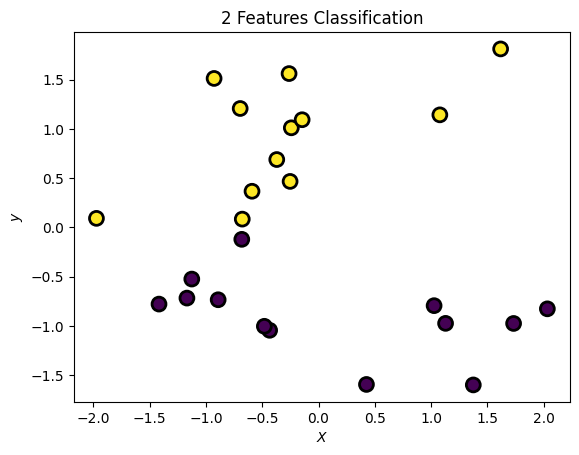

In [58]:
plt.scatter(test_X[:, 0], test_X[:, 1], marker='o', c=predict_Y,s=100, edgecolor="k", linewidth=2)

plt.title("2 Features Classification")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()
